# Lab №2

### 0. Import the necessary libraries

In [133]:
from math import pi
import numpy as np
import roboticstoolbox as rtb
import matplotlib.pyplot as plt
import spatialmath.base as sb

### 1. Import the Stanford robot model

In [134]:
robot = rtb.models.DH.Stanford()
print(robot)

DHRobot: Stanford arm (by Victor Scheinman), 6 joints (RRPRRR), dynamics, standard DH parameters
┌────────┬───────┬────────┬────────┬─────────────────────┬────────┐
│   θⱼ   │  dⱼ   │   aⱼ   │   ⍺ⱼ   │         q⁻          │   q⁺   │
├────────┼───────┼────────┼────────┼─────────────────────┼────────┤
│  q1    │ 0.412 │      0 │ -90.0° │             -170.0° │ 170.0° │
│  q2    │ 0.154 │      0 │  90.0° │             -170.0° │ 170.0° │
│ -90.0° │    q3 │ 0.0203 │   0.0° │ 0.30479999999999996 │   1.27 │
│  q4    │     0 │      0 │ -90.0° │             -170.0° │ 170.0° │
│  q5    │     0 │      0 │  90.0° │              -90.0° │  90.0° │
│  q6    │     0 │      0 │   0.0° │             -170.0° │ 170.0° │
└────────┴───────┴────────┴────────┴─────────────────────┴────────┘

┌──┬──┐
└──┴──┘

┌──────┬─────┬─────┬────┬─────┬─────┬─────┐
│ name │ q0  │ q1  │ q2 │ q3  │ q4  │ q5  │
├──────┼─────┼─────┼────┼─────┼─────┼─────┤
│   qr │  0° │  0° │  0 │  0° │  0° │  0° │
│   qz │  0° │  0° │  0 │  0°

1. Let's define the mass of the links

In [135]:
# Masses (kg) - Approximated for Stanford arm
robot.links[0].m = 9.29    # Base
robot.links[1].m = 5.01    # Shoulder
robot.links[2].m = 4.25    # Elbow (prismatic joint)
robot.links[3].m = 1.08    # Wrist 1
robot.links[4].m = 0.63    # Wrist 2
robot.links[5].m = 0.51    # End-effector

2. Let's define the center of mass of each link

In [136]:
# Center of Mass (m) - Relative to link frames
robot.links[0].r = [0, 0, 0.1]          # Base CoM offset
robot.links[1].r = [0, -0.02, 0.12]     # Shoulder CoM
robot.links[2].r = [0, 0, 0.25]         # Elbow CoM (prismatic)
robot.links[3].r = [0, 0.01, 0.02]      # Wrist 1 CoM
robot.links[4].r = [0, 0, 0.01]         # Wrist 2 CoM
robot.links[5].r = [0, 0, 0.03]         # End-effector CoM

3. Let's define the inertia tensor of each link. Filling: [Lxx, Lyy, Lzz, Lxy, Lyz, Lxz]

In [137]:
# Inertia Tensors (kg·m²) - Diagonal approximations [Ixx, Iyy, Izz, Ixy, Iyz, Ixz]
robot.links[0].I = [0.1, 0.1, 0.05, 0, 0, 0]    # Base
robot.links[1].I = [0.05, 0.2, 0.15, 0, 0, 0]   # Shoulder
robot.links[2].I = [0.01, 0.01, 0.02, 0, 0, 0]  # Elbow
robot.links[3].I = [0.005, 0.003, 0.004, 0, 0, 0]  # Wrist 1
robot.links[4].I = [0.002, 0.002, 0.001, 0, 0, 0]  # Wrist 2
robot.links[5].I = [0.001, 0.001, 0.001, 0, 0, 0]  # End-effector

4. Let's set the moment of inertia of the drive

In [138]:
# Motor Inertia (kg·m²) - Typical servo values
robot.links[0].Jm = 0.0002    # Base motor
robot.links[1].Jm = 0.0002    # Shoulder motor
robot.links[2].Jm = 0.0001    # Elbow motor (prismatic)
robot.links[3].Jm = 0.00005   # Wrist 1 motor
robot.links[4].Jm = 0.00005   # Wrist 2 motor
robot.links[5].Jm = 0.00003   # End-effector motor

5. Let's define the coefficient of viscous friction of the drive

In [139]:
# Viscous Friction (N·m·s/rad)
robot.links[0].B = 0.01    # Base
robot.links[1].B = 0.008   # Shoulder
robot.links[2].B = 0.005   # Elbow
robot.links[3].B = 0.001   # Wrist 1
robot.links[4].B = 0.001   # Wrist 2
robot.links[5].B = 0.0005  # End-effector

6. Let's define the coefficient of Coulomb friction of the drive

In [140]:
# Coulomb Friction (N·m) - [T⁺, T⁻] for asymmetric friction
robot.links[0].Tc = [0.05, -0.06]   # Base
robot.links[1].Tc = [0.04, -0.05]   # Shoulder
robot.links[2].Tc = [0.02, -0.03]   # Elbow
robot.links[3].Tc = [0.01, -0.015]  # Wrist 1
robot.links[4].Tc = [0.01, -0.015]  # Wrist 2
robot.links[5].Tc = [0.005, -0.01]  # End-effector

7. Let's set the gear ratio for each link

In [141]:
# Gear Ratios (motor:joint)
robot.links[0].G = 120    # Base
robot.links[1].G = 100    # Shoulder
robot.links[2].G = 80     # Elbow
robot.links[3].G = 50     # Wrist 1
robot.links[4].G = 50     # Wrist 2
robot.links[5].G = 30     # End-effector

8. Let's set restrictions on the generalized coordinates for each link

In [142]:
# Joint Limits (radians)
robot.links[0].qlim = [-pi, pi]      # Base rotation
robot.links[1].qlim = [-pi, pi]      # Shoulder
robot.links[2].qlim = [0, 0.5]       # Elbow (prismatic, in meters)
robot.links[3].qlim = [-pi, pi]      # Wrist 1
robot.links[4].qlim = [-pi, pi]      # Wrist 2
robot.links[5].qlim = [-pi, pi]      # End-effector

### 2. Set the initial position of the robot and plot it

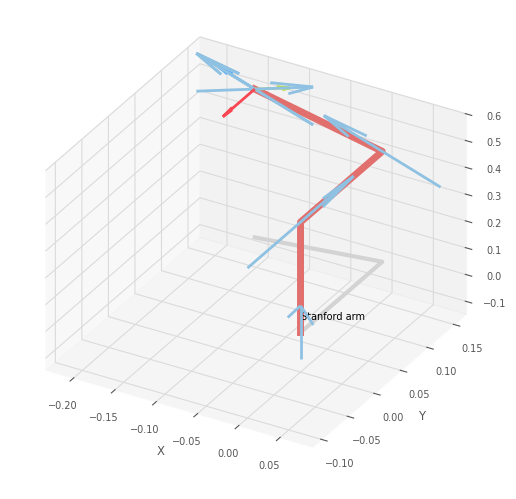

<Figure size 640x480 with 0 Axes>

In [143]:
q_start = [0, -pi/4, 0.2, 0, 0, 0]
robot.plot(q_start)
plt.show()

### 3. Solve the forward kinematics problem

In [144]:
T_start = robot.fkine(q_start)
print(T_start)

   0         0.7071   -0.7071   -0.1414    
  -1         0         0         0.1337    
   0         0.7071    0.7071    0.5534    
   0         0         0         1         



### 6. Plot the workspace of the manipulator

Initialize variables

In [145]:
n = 30  # Number of points along each axis  
i = 0  # Simple counter  

# Generate movement range for first 3 joints (between joint limits)
move = [np.linspace(robot.links[i].qlim[0], robot.links[i].qlim[1], n) for i in range(3)]  

# Initialize empty array for storing pose data (3D coordinates)
pose = np.zeros([3, n**3])  

Calculating the workspace

In [146]:
# Iterate through each point in the grid
for q1 in move[0]:
    for q2 in move[1]:
        for q3 in move[2]:
                Tt = robot.fkine([q1,q2,q3,0,0,0])  # Solve forward kinematics using only first 3 joint coordinates
                for j in range(3):
                    pose[j][i] = Tt.t[j]  # Store point coordinates
                i += 1

Visualize the workspace

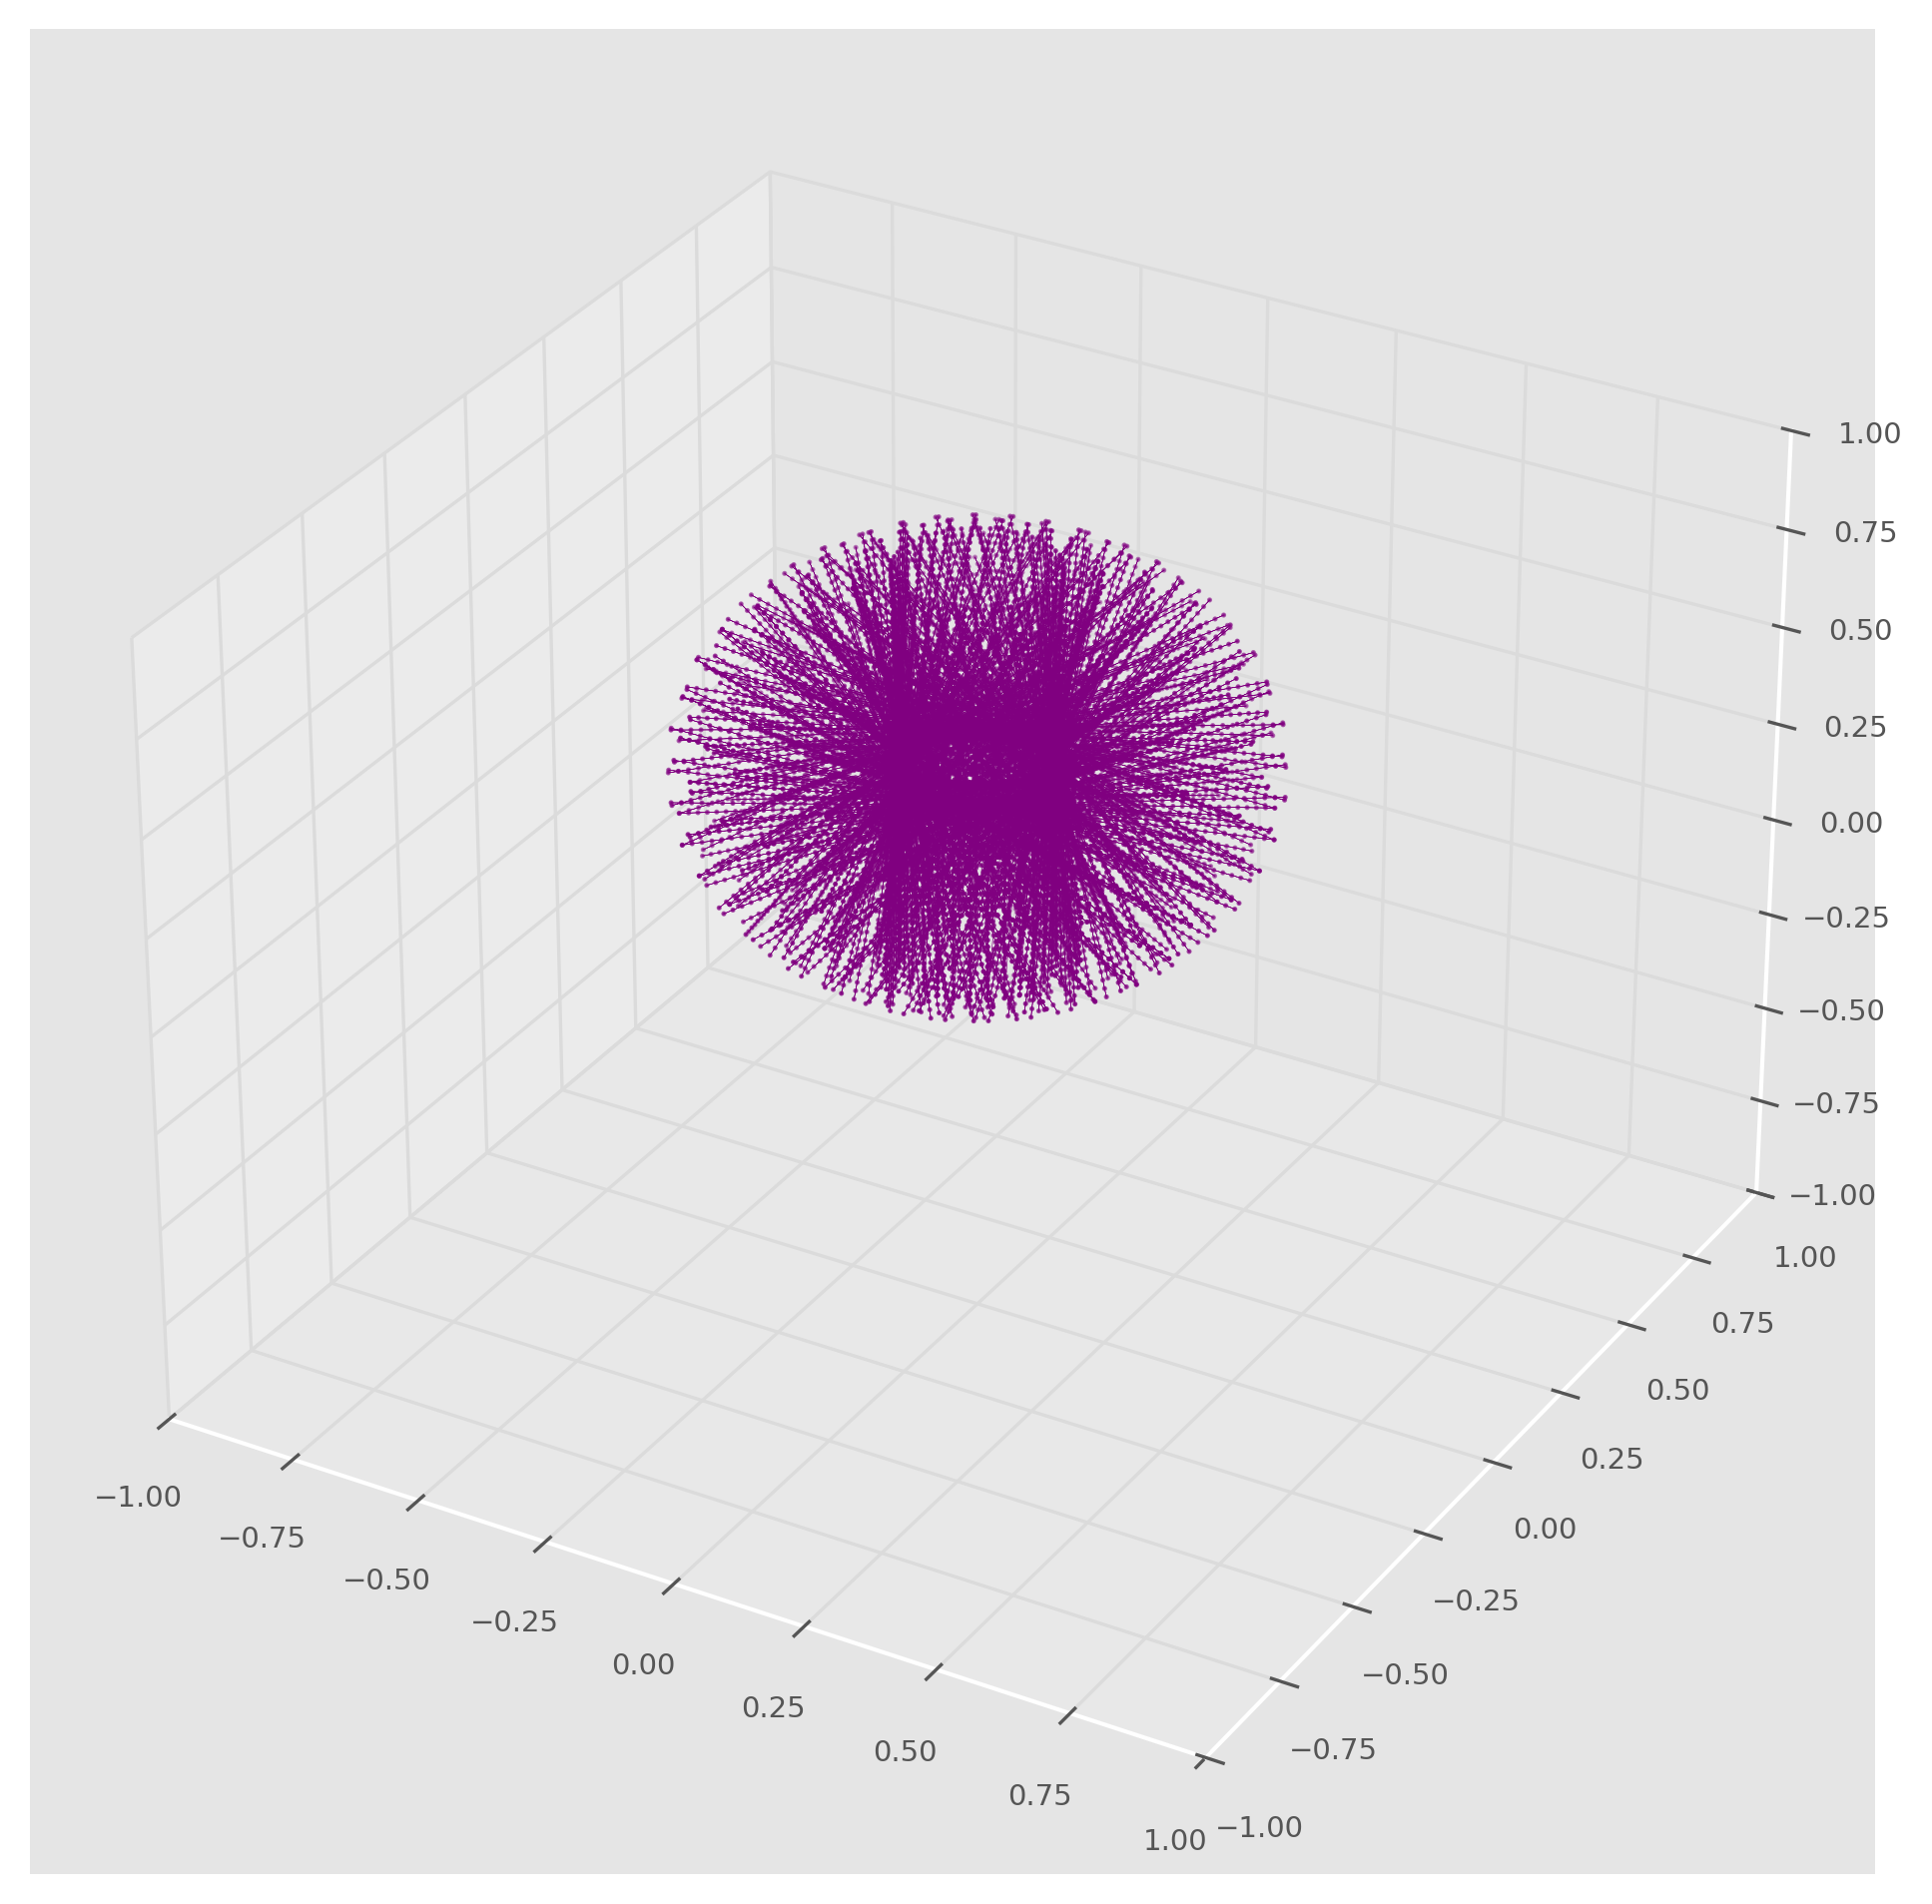

In [147]:
plt.figure(figsize=(8,8), dpi=300)
ax = plt.axes(projection="3d")
ax.plot3D(pose[0], pose[1], pose[2], color='Purple', linewidth=0.15)
ax.scatter3D(pose[0], pose[1], pose[2], s=0.5, color='Purple')
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)
plt.show()

### 7. Select an end point and verify it (solve the inverse kinematics problem)

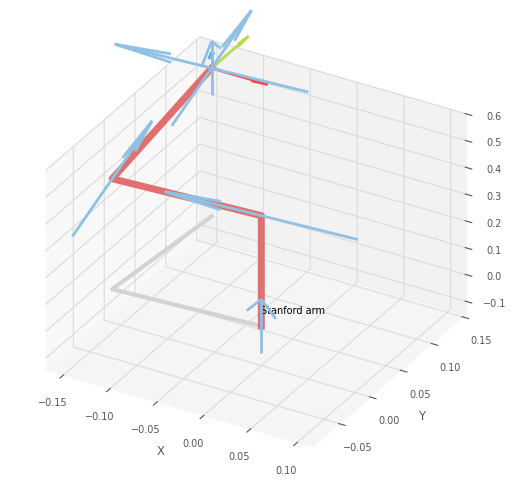

<Figure size 640x480 with 0 Axes>

In [158]:
point = [-0.1414, 0.1337, 0.5534]  # Target end-effector position [x, y, z]
T_end = sb.transl(point)  # Create homogeneous transformation matrix for translation

# Solve inverse kinematics using Gauss-Newton method (other methods available)
q_end = robot.ikine_GN(T_end).q  

# Visualize robot configuration
robot.plot(q_end)
plt.show()

### 8. Plan the trajectory

Plan the trajectory using the 'jtraj' method for N=100 points

In [149]:
N = 100
t_start = 0
t_stop = 5
t_shag = t_stop/N
time = np.arange(t_start, t_stop, t_shag)

tr_jtraj = rtb.jtraj(q_start, q_end, time)

Plan the same trajectory using the 'mtraj' method with the 'trapezoidal' function

In [150]:
tr_trap = rtb.mtraj(rtb.trapezoidal, q_start, q_end, time)

Plan the same trajectory using the 'mtraj' method with the 'quintic' function

In [151]:
tr_quin = rtb.mtraj(rtb.quintic, q_start, q_end, time)

### 9. Plot the graphs

Plot the position graphs for each link

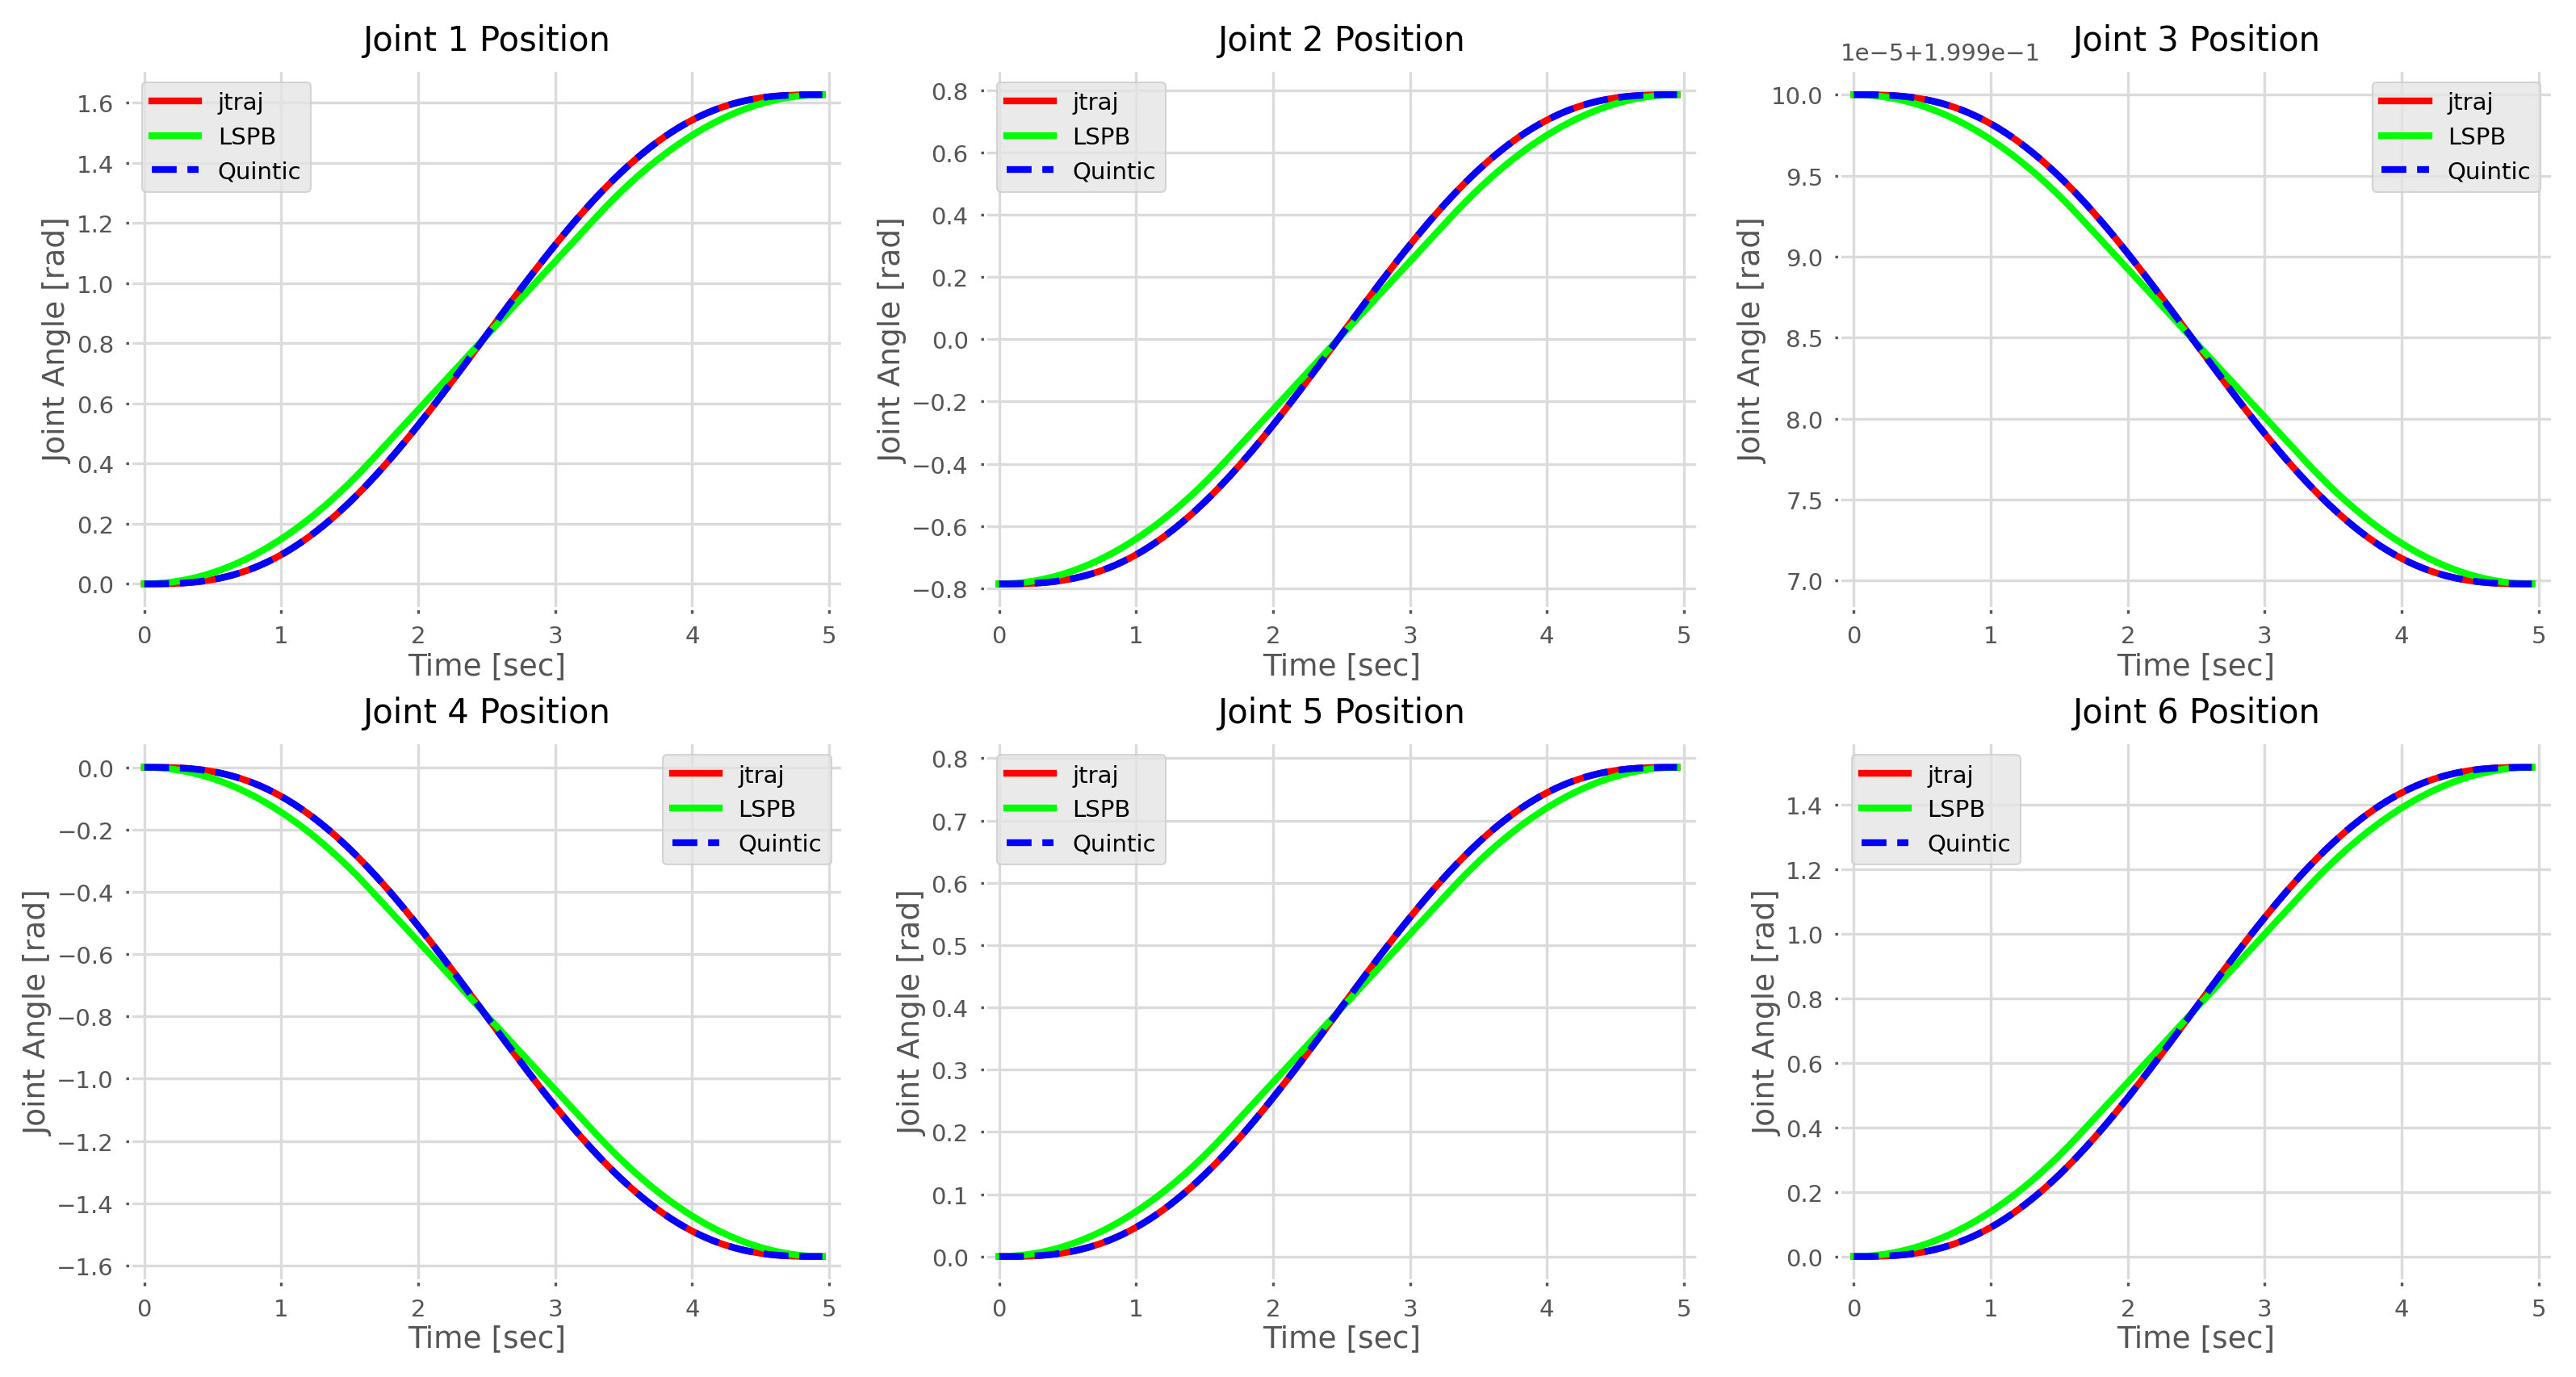

In [152]:
plt.figure(figsize=(10,5), dpi=300)  # Set figure size and resolution (DPI)
for joint_num in range(1,7):
    plt.subplot(2,3,joint_num)
    plt.subplots_adjust(left=0, bottom=0, right=1, top=1, 
                       wspace=0.2, hspace=0.25)  # Adjust subplot spacing
    
    # Extract joint trajectories
    jtraj_traj = [tr_jtraj.q[i][joint_num-1] for i in range(len(tr_jtraj.q))]
    trap_traj = [tr_trap.q[i][joint_num-1] for i in range(len(tr_trap.q))] 
    quin_traj = [tr_quin.q[i][joint_num-1] for i in range(len(tr_quin.q))]
    
    # Plot trajectories with different styles
    plt.plot(time, jtraj_traj, linestyle='-', linewidth=2, 
             color=(1,0,0), label="jtraj")
    plt.plot(time, trap_traj, linestyle='-', linewidth=2,
             color=(0,1,0), label="LSPB") 
    plt.plot(time, quin_traj, linestyle='--', linewidth=2,
             color=(0,0,1), label="Quintic")
             
    plt.title(f"Joint {joint_num} Position", fontsize=10)
    plt.ylabel("Joint Angle [rad]", fontsize=9)
    plt.xlabel("Time [sec]", fontsize=9)
    plt.grid(True)
    plt.legend()
    
    ax = plt.gca()  # Get current axis
    ax.set_facecolor((1,1,1))  # Set white background
    ax.set_xlim([t_start-0.1, t_stop+0.1])  # Set x-axis limits
    
plt.show()

Plot velocity profiles for each joint

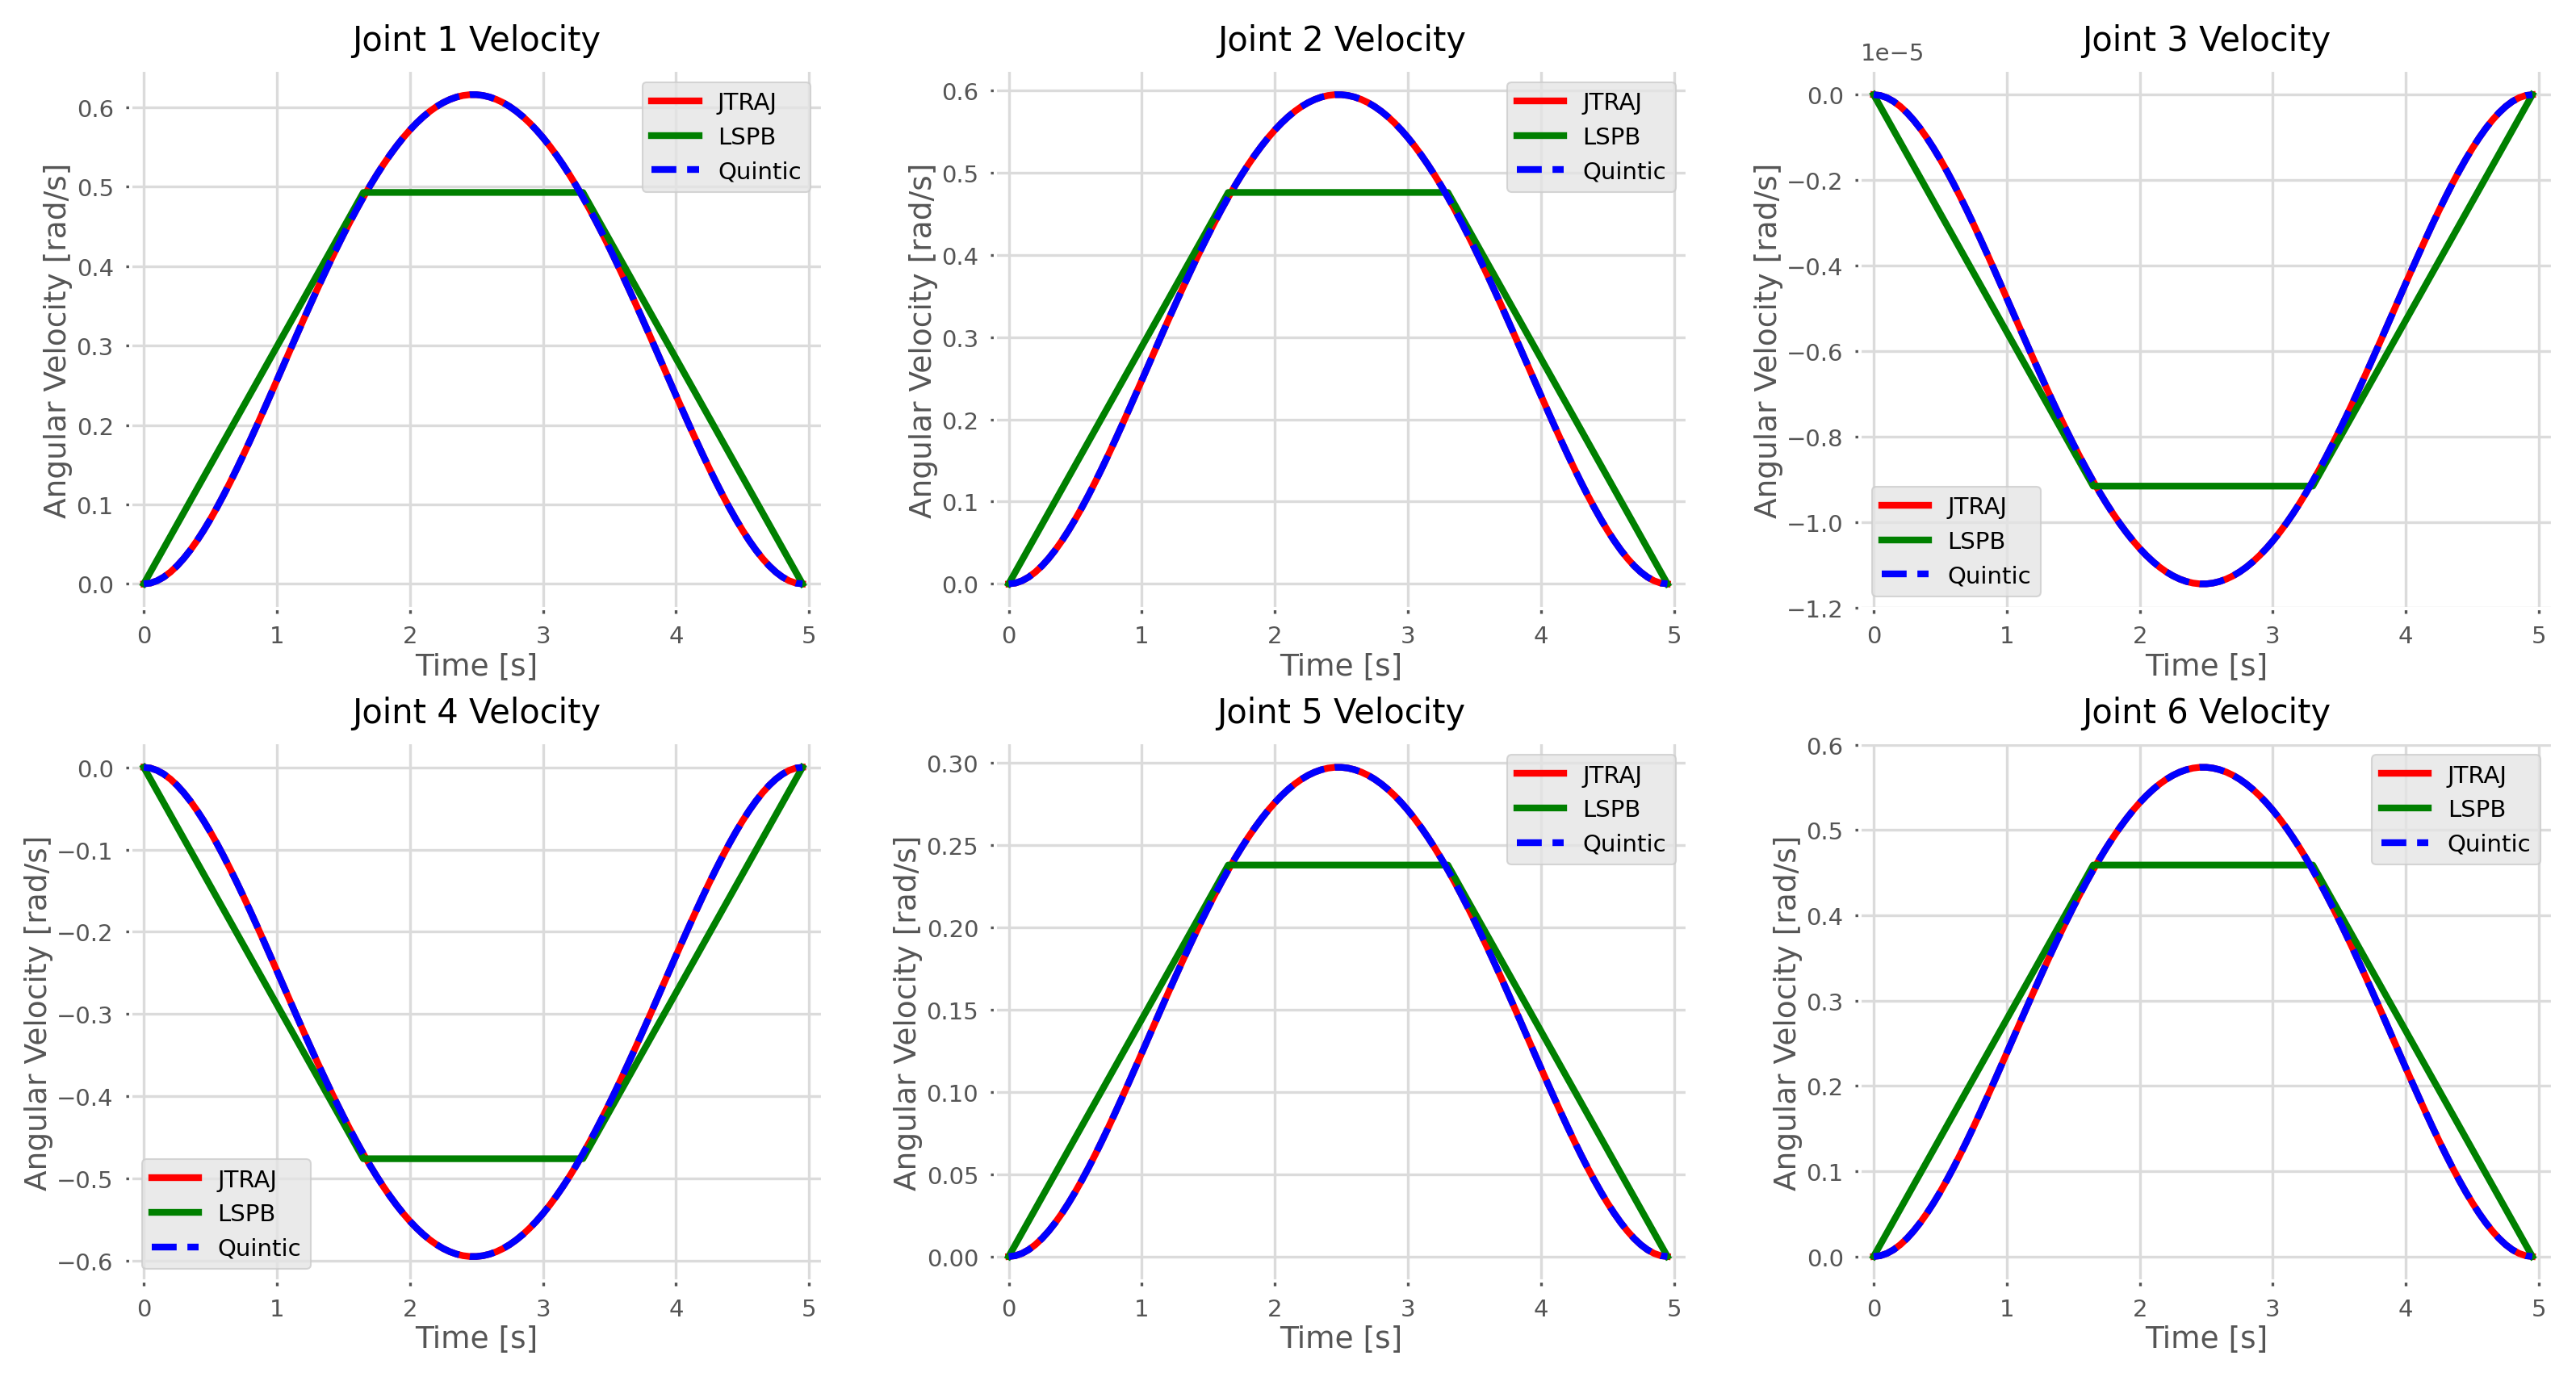

In [153]:
# Create figure with high resolution (300 DPI)
plt.figure(figsize=(10,5), dpi=300)

# Plot velocity profiles for all 6 joints
for joint_idx in range(1,7):
    plt.subplot(2,3,joint_idx)
    
    # Adjust subplot spacing to prevent overlap
    plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.25, hspace=0.25)
    
    # Extract velocity data for each trajectory type
    jtraj_velocity = [tr_jtraj.qd[i][joint_idx-1] for i in range(len(tr_jtraj.qd))]
    trap_velocity = [tr_trap.qd[i][joint_idx-1] for i in range(len(tr_trap.qd))]
    quin_velocity = [tr_quin.qd[i][joint_idx-1] for i in range(len(tr_quin.qd))]
    
    # Plot velocity trajectories with different styles
    plt.plot(time, jtraj_velocity, '-', linewidth=2, color='red', label="JTRAJ")
    plt.plot(time, trap_velocity, '-', linewidth=2, color='green', label="LSPB")
    plt.plot(time, quin_velocity, '--', linewidth=2, color='blue', label="Quintic")
    
    # Configure plot appearance
    plt.title(f"Joint {joint_idx} Velocity", fontsize=10)
    plt.ylabel("Angular Velocity [rad/s]", fontsize=9)
    plt.xlabel("Time [s]", fontsize=9)
    plt.grid(True)
    plt.legend()
    
    # Customize axes
    ax = plt.gca()
    ax.set_facecolor('white')  # Set white background
    ax.set_xlim([t_start-0.1, t_stop+0.1])  # Set time axis limits

plt.show()

Plot acceleration profiles for each joint

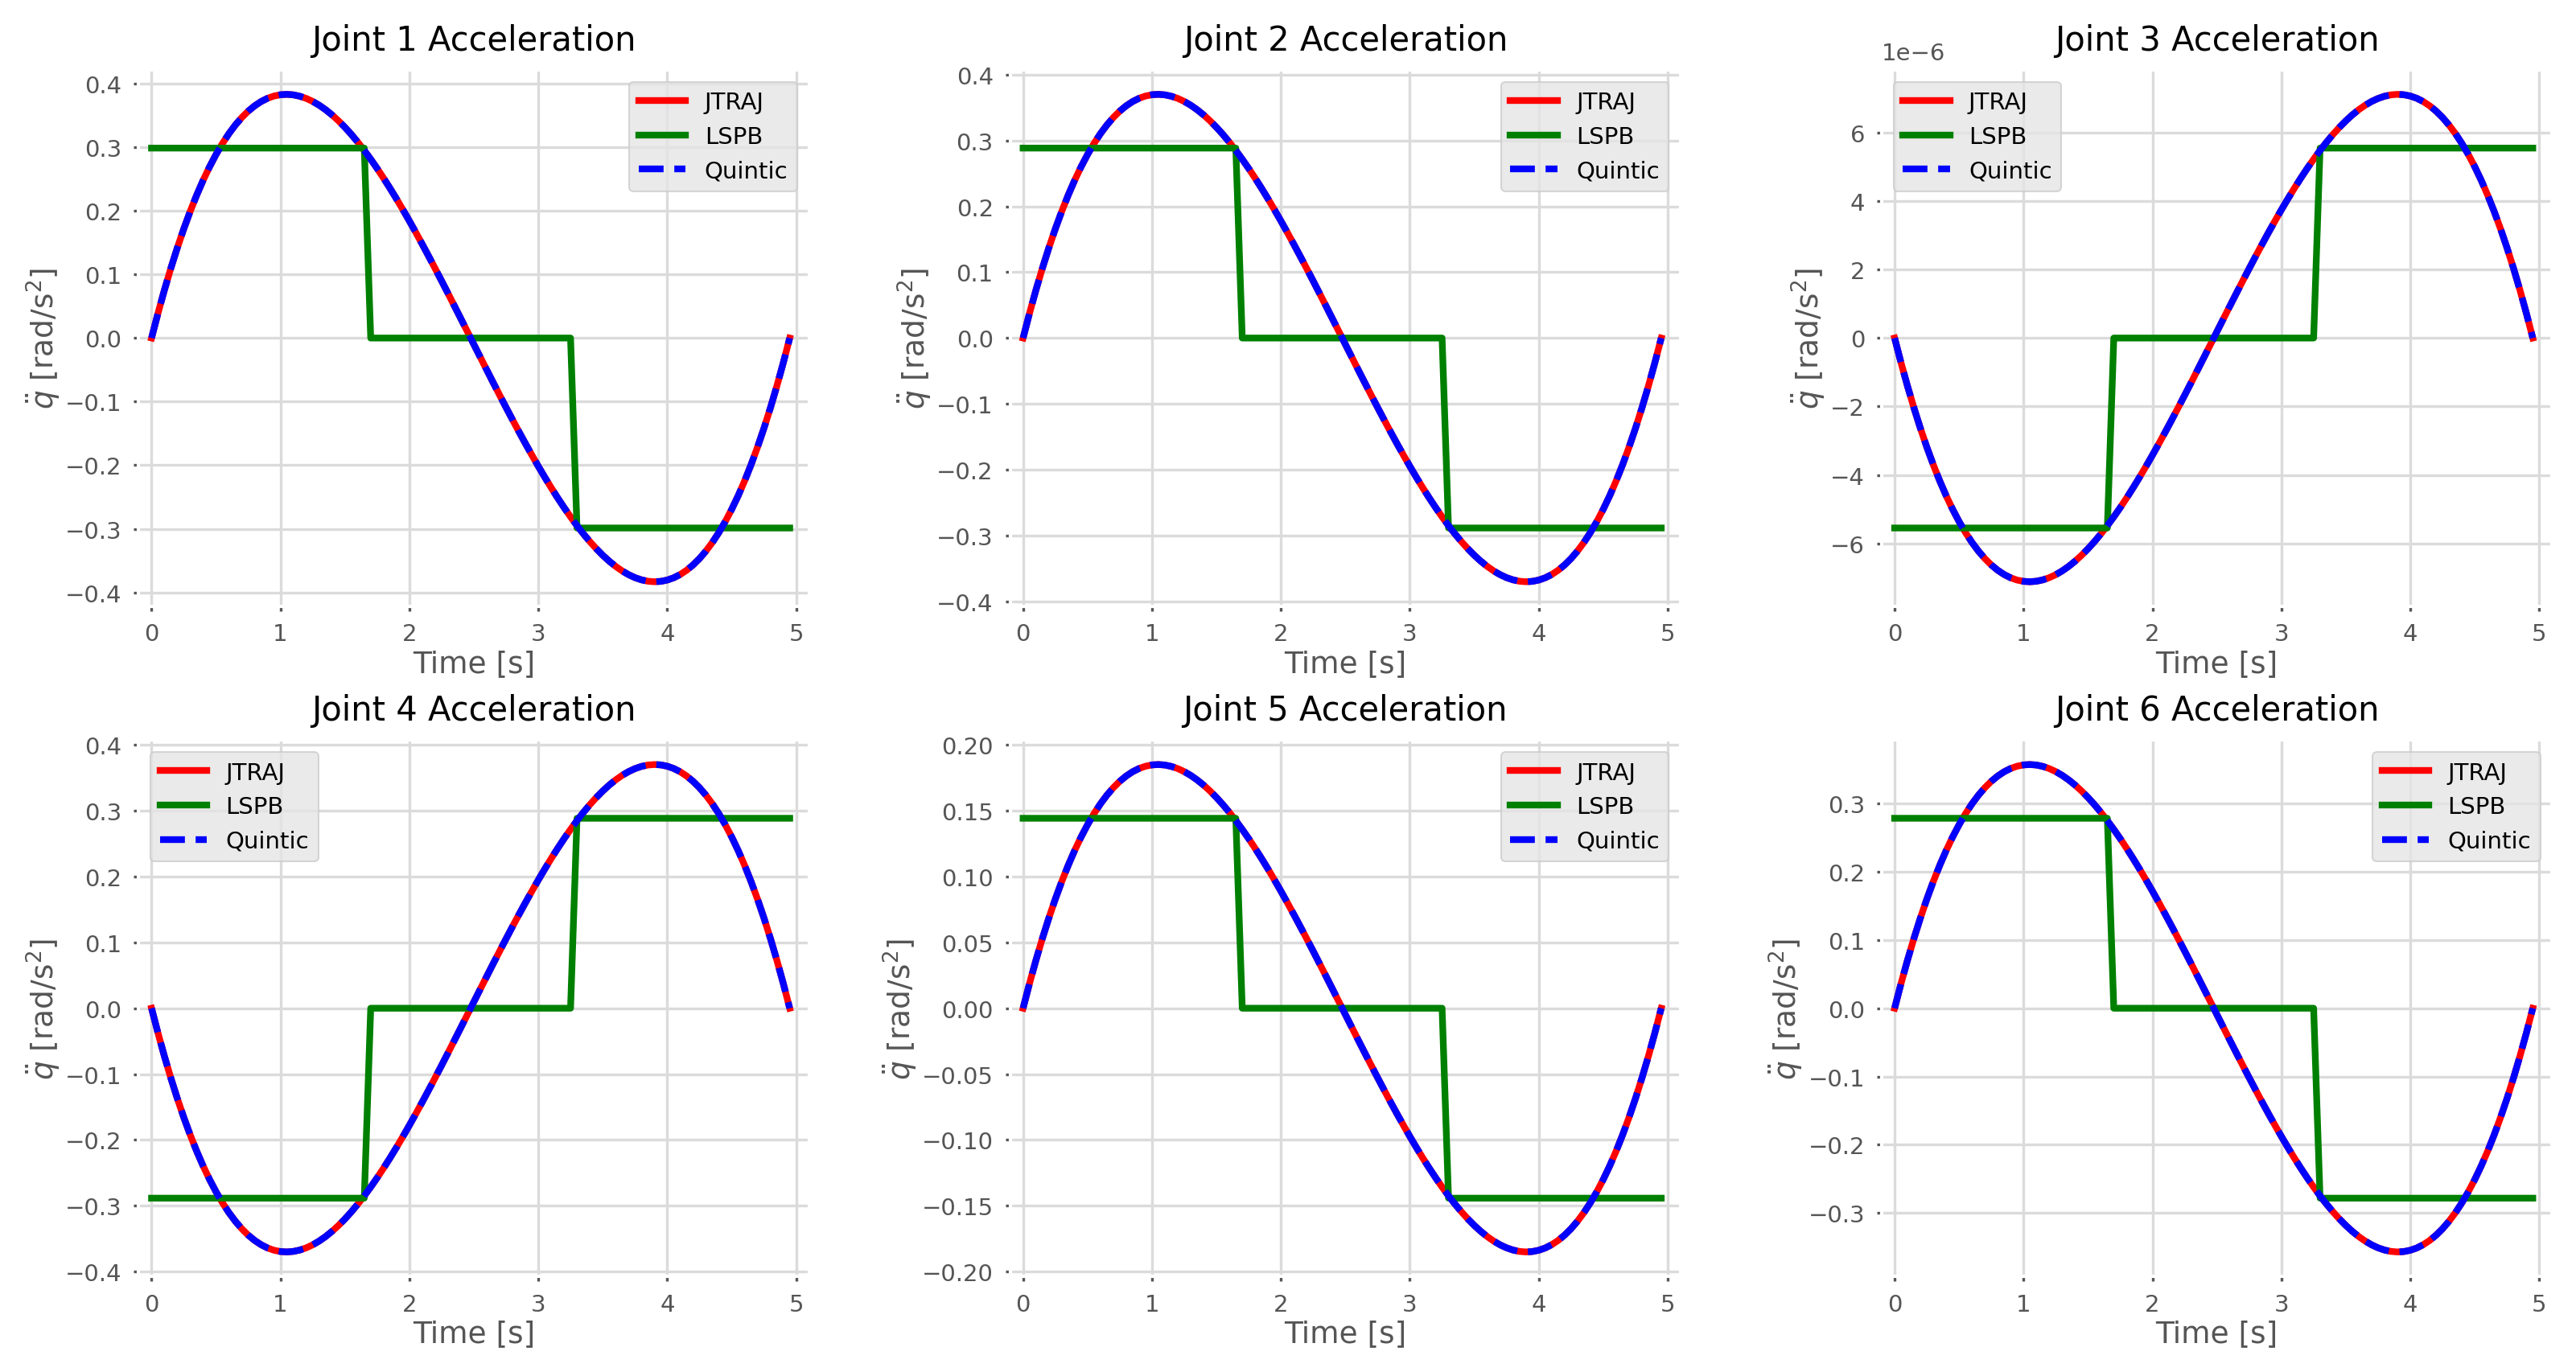

In [154]:
# Create figure with high resolution for publication quality
fig = plt.figure(figsize=(10,5), dpi=300)

# Plot acceleration profiles for all 6 joints
for joint_num in range(1,7):
    ax = plt.subplot(2,3,joint_num)
    
    # Optimize subplot spacing 
    plt.subplots_adjust(left=0, bottom=0, right=1, top=1, 
                      wspace=0.3, hspace=0.25)
    
    # Extract acceleration data for each trajectory type
    jtraj_acc = [tr_jtraj.qdd[i][joint_num-1] for i in range(len(tr_jtraj.qdd))]
    lspb_acc = [tr_trap.qdd[i][joint_num-1] for i in range(len(tr_trap.qdd))]
    quintic_acc = [tr_quin.qdd[i][joint_num-1] for i in range(len(tr_quin.qdd))]
    
    # Plot with consistent styling
    plt.plot(time, jtraj_acc, '-', lw=2, color='red', label="JTRAJ")
    plt.plot(time, lspb_acc, '-', lw=2, color='green', label="LSPB")
    plt.plot(time, quintic_acc, '--', lw=2, color='blue', label="Quintic")
    
    # Configure plot appearance
    plt.title(f"Joint {joint_num} Acceleration", fontsize=10)
    plt.ylabel(r"$\ddot{q}$ [rad/s$^2$]", fontsize=9)
    plt.xlabel("Time [s]", fontsize=9)
    plt.grid(True)
    plt.legend()
    
    # Format axes
    ax.set_facecolor('white')
    ax.set_xlim([t_start-0.1, t_stop+0.1])

plt.show()

**Conclusion**

The simulation and analysis of the Stanford robotic arm provided a detailed exploration of its kinematic and dynamic characteristics through accurate modeling of physical properties such as mass distribution, center of mass, inertia tensors, and joint constraints. Using both forward and inverse kinematics, the robot's ability to reach specific spatial targets was validated, verifying precise end-effector positioning and motion control. Among the methods analyzed jtraj, trapezoidal (LSPB), and quintic each was employed to transition the robot between two configurations. A comparison of joint position, velocity, and acceleration plots revealed that the quintic method produced the smoothest trajectories, with continuous velocity and acceleration profiles and minimal abrupt changes, making it the most suitable for applications requiring minimal mechanical stress and high precision. In contrast, the LSPB method, while simpler, exhibited abrupt changes in acceleration, and jtraj offered a balance between simplicity and smoothness. Ultimately, the quintic method stands out as the optimal choice for refined motion control in complex robotic tasks, as its higher-order continuity ensures smoother and more stable motion.